In [1]:
import urllib.request, json

In [11]:
url = "https://climathon.iblsoft.com/data/era5-land-monthly-means-by-hour/edr/collections/height-above-ground/position?coords=POINT(17.1785 48.1628)&parameter-name=temperature&datetime=2010-07-01T15:00,2011-07-01T15:00,2012-07-01T15:00,2013-07-01T15:00,2014-07-01T15:00,2015-07-01T15:00"
url = url.replace(" ", "%20")

json_url = urllib.request.urlopen(url)
data = json.loads(json_url.read())
json_formatted_str = json.dumps(data, indent=2)

print(json_formatted_str)

{
  "type": "CoverageCollection",
  "domainType": "Point",
  "parameters": {
    "temperature": {
      "type": "Parameter",
      "unit": {
        "symbol": "K"
      },
      "observedProperty": {
        "label": {
          "en": "Temperature"
        }
      }
    }
  },
  "referencing": [
    {
      "coordinates": [
        "y",
        "x"
      ],
      "system": {
        "type": "GeographicCRS",
        "id": "http://www.opengis.net/def/crs/EPSG/0/4326",
        "wkt": "GEOGCS[\"Unknown\", DATUM[\"Unknown\", SPHEROID[\"WGS_1984\", 6378137.0, 298.257223563]], PRIMEM[\"Greenwich\",0], UNIT[\"degree\", 0.017453], AXIS[\"Lon\", EAST], AXIS[\"Lat\", NORTH]]"
      }
    },
    {
      "coordinates": [
        "z"
      ],
      "system": {
        "type": "VerticalCRS",
        "cs": {
          "csAxes": [
            {
              "name": {
                "en": "Height above ground"
              },
              "direction": "up",
              "unit": {
                "s

# data from Year 2010 in Region of Zilina

In [126]:
# zilinsky kraj
# region dolny roh POINT(18.47844387661973, 48.666622651061914) horny roh POINT(19.996486023766415, 49.64911303448068) {Longitude, Latitude}

url = "https://climathon.iblsoft.com/data/era5-land-monthly-means-by-hour/edr/collections/single-layer_24/cube?bbox=18.47844387661973,48.666622651061914,19.996486023766415,49.64911303448068&datetime=R365%2F2010-01-01T00%3A00%3A00%2FP1D&parameter-name=total-precipitation_gnd-surf_stat%3Aacc%2FP1D&resolution-x=10&resolution-y=10&f=CoverageJSON"
url = url.replace(" ", "%20")

json_url = urllib.request.urlopen(url)
data = json.loads(json_url.read())
json_formatted_str = json.dumps(data, indent=2)

print(json_formatted_str)

{
  "type": "CoverageCollection",
  "domainType": "Grid",
  "parameters": {
    "total-precipitation_gnd-surf_stat:acc/P1D": {
      "type": "Parameter",
      "unit": {
        "symbol": "mm"
      },
      "observedProperty": {
        "label": {
          "en": "Total precipitation - Ground surface - Accumulation 24h"
        }
      }
    }
  },
  "referencing": [
    {
      "coordinates": [
        "y",
        "x"
      ],
      "system": {
        "type": "GeographicCRS",
        "id": "http://www.opengis.net/def/crs/EPSG/0/4326",
        "wkt": "GEOGCS[\"Unknown\", DATUM[\"Unknown\", SPHEROID[\"WGS_1984\", 6378137.0, 298.257223563]], PRIMEM[\"Greenwich\",0], UNIT[\"degree\", 0.017453], AXIS[\"Lon\", EAST], AXIS[\"Lat\", NORTH]]"
      }
    },
    {
      "coordinates": [
        "t"
      ],
      "system": {
        "type": "TemporalRS",
        "calendar": "Gregorian"
      }
    }
  ],
  "coverages": [
    {
      "type": "Coverage",
      "domain": {
        "type": "Doma

In [174]:
import numpy as np
import pandas as pd
from datetime import datetime


In [104]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [227]:
def day_bar_plot(data, n):

    # #
    # Create mesh grid between two points
    # #
    
    day = data["coverages"][n]

    day_x_start = day["domain"]["axes"]["x"]["start"]
    day_x_end = day["domain"]["axes"]["x"]["stop"]
    day_y_start = day["domain"]["axes"]["y"]["start"]
    day_y_end = day["domain"]["axes"]["y"]["stop"]
    
    xs = np.linspace(day_x_start, day_x_end, 7)
    ys = np.linspace(day_y_start, day_y_end, 3)
    mesh = np.array(np.meshgrid(xs, ys)).T.reshape(-1, 2)

    # #
    # add precipitation for every point in grid
    # #

    precipitation = day["ranges"]["total-precipitation_gnd-surf_stat:acc/P1D"]["values"]
    precipitation = np.expand_dims(precipitation, axis=1)

    precipitation_and_coors = np.hstack((mesh, precipitation))


    # #
    # Plot Graph
    # #

    # fig = plt.figure()
    # ax1 = fig.add_subplot(111, projection='3d')
    # 
    # top = precipitation_and_coors[:,0] + precipitation_and_coors[:, 1]
    # width = depth = 1
    # 
    # ax1.bar3d(
    #     precipitation_and_coors[:, 0], precipitation_and_coors[:, 1], precipitation_and_coors[:, 2], 
    #     0.2, 0.2, top, 
    #     shade=True, edgecolor='black'
    # )
    # ax1.set_title('percipitation for region of Zilina in one day in year 2010')
    # 
    # ax1.set_xlabel('x axis')
    # ax1.set_ylabel('y axis')
    # ax1.set_zlabel('total precipitation [K]')
    
    # #
    # create the mean
    # #
    date = data["coverages"][n]["domain"]["axes"]['t']['values'][0]
    dt = datetime.strptime(date, "%Y-%m-%dT%H:%M:%SZ")
    try:
        mean = np.mean(precipitation)
    except TypeError:
        mean = np.nan
    
    df = pd.DataFrame(data = {
        "time": [dt], "mean_precipitation": [mean]
    })
    
    return df

In [189]:
df_starting_day1 = day_bar_plot(data, 0)

for i in range(1, 365):
    df_starting_day1 = pd.concat([df_starting_day1, day_bar_plot(data, i)])

In [192]:
df_starting_day1 = df_starting_day1.set_index("time")
df_starting_day1

,mean_precipitation
time,
2010-01-01,1.769404
2010-01-02,1.755006
2010-01-03,1.761049
2010-01-04,1.767092
2010-01-05,1.773134
...,...
2010-12-27,1.679572
2010-12-28,1.637945
2010-12-29,1.596318


<Axes: xlabel='time'>

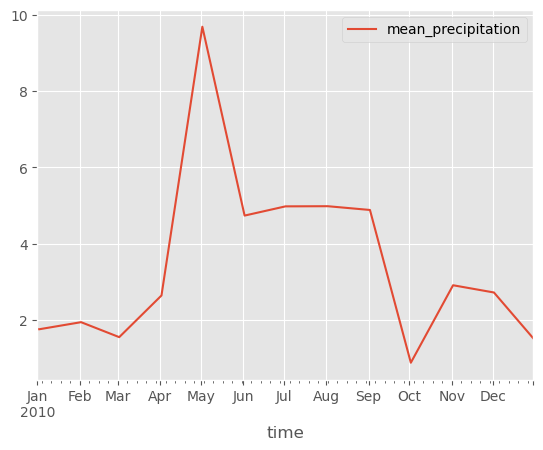

In [193]:
df_starting_day1.plot()

# from 1950 till 2023 graph of precipitation over monthly means in region of Zilina 

In [310]:
def polynomial_fit(df_index, df_col, deg):
    '''
    Method to provide least squares polynomial fit of specific column of DF
    :df_index - index of DF
    :df_column - specific column of DF
    : deg - degree of the fitting polynomial
    '''
    x = np.arange(0, len(df_index.values))
    y = df_col.values
    poly_model = np.polyfit(x, y, deg)
    predict = np.poly1d(poly_model)
    return predict(x)

In [206]:
def is_leap_year ( year ):
    if year % 4 == 0 and year % 100 != 0 or year % 400 == 0: return True
    else: return False

In [213]:
final_df = pd.DataFrame()

for i in range(1950, 2022):
    url = f"https://climathon.iblsoft.com/data/era5-land-monthly-means-by-hour/edr/collections/single-layer_24/cube?bbox=18.47844387661973,48.666622651061914,19.996486023766415,49.64911303448068&datetime=R365%2F{i}-01-01T00%3A00%3A00%2FP1D&parameter-name=total-precipitation_gnd-surf_stat%3Aacc%2FP1D&resolution-x=10&resolution-y=10&f=CoverageJSON"
    url = url.replace(" ", "%20")
    
    json_url = urllib.request.urlopen(url)
    data = json.loads(json_url.read())
    
    print(i)
    if is_leap_year(i):
        df = day_bar_plot(data, 0)
        for k in range(1, 365):
            df = pd.concat([df, day_bar_plot(data, k)])
        df = df.set_index("time")
        final_df = pd.concat([final_df, df])
    else:
        df = day_bar_plot(data, 0)
        for k in range(1, 364):
            df = pd.concat([df, day_bar_plot(data, k)])
        df = df.set_index("time")
        final_df = pd.concat([final_df, df])
        

1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


Text(0.5, 1.0, 'Total Precipitation from 1950 till 2021 in the region of Žilina in Slovakia')

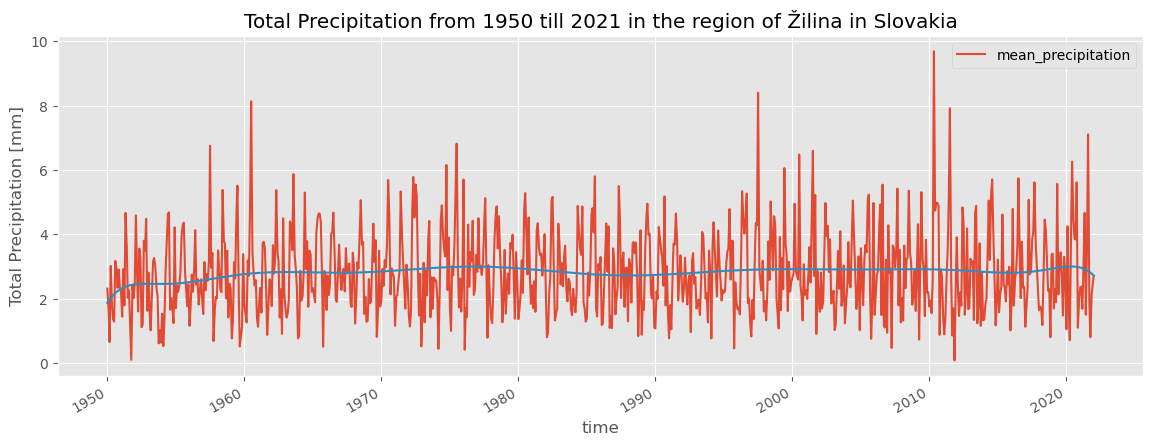

In [313]:
final_df.plot(figsize=(14, 5))
plt.plot(final_df.index, polynomial_fit(final_df.index, final_df["mean_precipitation"], 12))
plt.ylabel("Total Precipitation [mm]")
plt.title("Total Precipitation from 1950 till 2021 in the region of Žilina in Slovakia")

In [218]:
final_df.to_csv("./data/Zilina_70years_percipation.csv")

# from 1950 till 2023 graph of precipitation over monthly means in region of Banska Bystrica 

In [224]:
final_df_banska = pd.DataFrame()

for i in range(1950, 2022):
    url = f"https://climathon.iblsoft.com/data/era5-land-monthly-means-by-hour/edr/collections/single-layer_24/cube?bbox=18.609028147342066,48.055211249395384,20.225008497530442,49.02870118513124&datetime=R365%2F{i}-01-01T00%3A00%3A00%2FP1D&parameter-name=total-precipitation_gnd-surf_stat%3Aacc%2FP1D&resolution-x=6&resolution-y=4&f=CoverageJSON"
    url = url.replace(" ", "%20")

    json_url = urllib.request.urlopen(url)
    data = json.loads(json_url.read())

    print(i)
    if is_leap_year(i):
        df = day_bar_plot(data, 0)
        for k in range(1, 365):
            df = pd.concat([df, day_bar_plot(data, k)])
        df = df.set_index("time")
        final_df_banska = pd.concat([final_df, df])
    else:
        df = day_bar_plot(data, 0)
        for k in range(1, 364):
            df = pd.concat([df, day_bar_plot(data, k)])
        df = df.set_index("time")
        final_df_banska = pd.concat([final_df, df])

1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


Text(0.5, 1.0, 'Total Precipitation from 1950 till 2021 in the region of Bánska Bystrica in Slovakia')

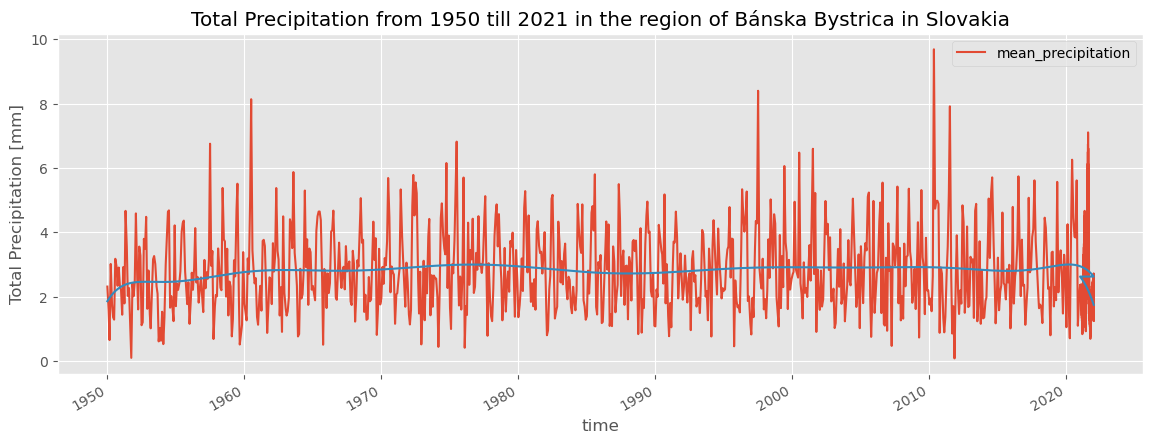

In [315]:
final_df_banska.plot(figsize=(14, 5))
plt.plot(final_df_banska.index, polynomial_fit(final_df_banska.index, final_df_banska["mean_precipitation"], 12))
plt.ylabel("Total Precipitation [mm]")
plt.title("Total Precipitation from 1950 till 2021 in the region of Bánska Bystrica in Slovakia")

In [230]:
final_df_banska.to_csv("./data/BanskaBystrica_70years_percipation.csv")

# Kosicko-presovky region 1950 - 2023 70 Years of Data

In [228]:
final_df_KEPO = pd.DataFrame()

for i in range(1950, 2022):
    url = f"https://climathon.iblsoft.com/data/era5-land-monthly-means-by-hour/edr/collections/single-layer_24/cube?bbox=20.135231811408843,48.64910067985261,21.571658789354096,49.13249756034418&datetime=R365%2F2010-01-01T00%3A00%3A00%2FP1D&parameter-name=total-precipitation_gnd-surf_stat%3Aacc%2FP1D&resolution-x=7&resolution-y=3&f=CoverageJSON"
    url = url.replace(" ", "%20")

    json_url = urllib.request.urlopen(url)
    data = json.loads(json_url.read())

    print(i)
    if is_leap_year(i):
        df = day_bar_plot(data, 0)
        for k in range(1, 365):
            df = pd.concat([df, day_bar_plot(data, k)])
        df = df.set_index("time")
        final_df_KEPO = pd.concat([final_df, df])
    else:
        df = day_bar_plot(data, 0)
        for k in range(1, 364):
            df = pd.concat([df, day_bar_plot(data, k)])
        df = df.set_index("time")
        final_df_KEPO = pd.concat([final_df, df])

1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


Text(0.5, 1.0, 'Total Precipitation from 1950 till 2021 in the region of Košice and Prešov in Slovakia')

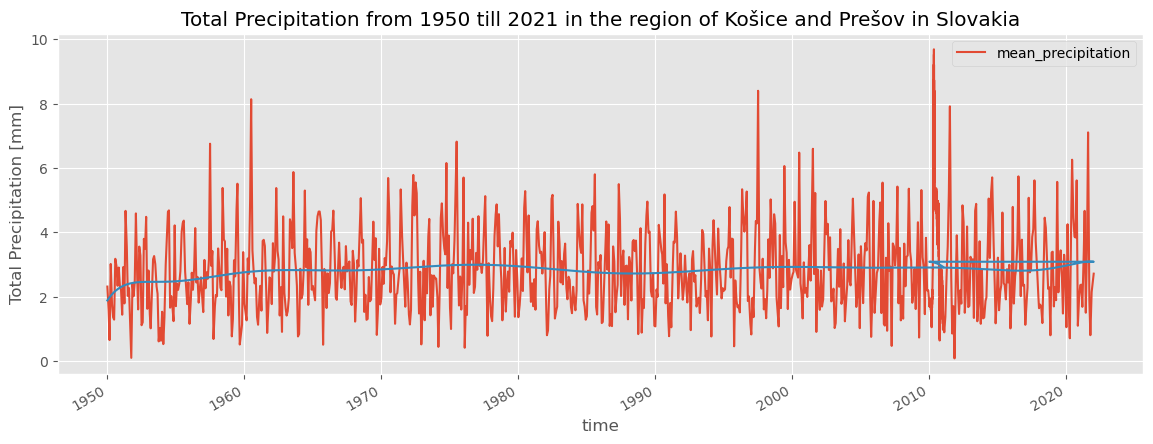

In [320]:
final_df_KEPO.plot(figsize=(14, 5))
plt.plot(final_df_KEPO.index, polynomial_fit(final_df_KEPO.index, final_df_KEPO["mean_precipitation"], 12))
plt.ylabel("Total Precipitation [mm]")
plt.title("Total Precipitation from 1950 till 2021 in the region of Košice and Prešov in Slovakia")

In [231]:
final_df_KEPO.to_csv("./data/KosicePresov_70years_percipation.csv")

# Percentage of lowest total percipitation in hottest months MAY, JUNE, JULY, AUGUST

In [232]:
final_df_zilina = final_df

In [235]:
final_df_zilina.min(), final_df_banska.min(), final_df_KEPO.min()

(mean_precipitation    0.085041
 dtype: float64,
 mean_precipitation    0.085041
 dtype: float64,
 mean_precipitation    0.085041
 dtype: float64)

In [321]:
zilina_hottest = final_df_zilina.loc[final_df_zilina.index.month.isin([5, 6, 7, 8])]
zilina_tresh = zilina_hottest[(zilina_hottest < 2).any(1)]

banska_hottest = final_df_banska.loc[final_df_banska.index.month.isin([5, 6, 7, 8])]
banska_tresh = banska_hottest[(banska_hottest < 2).any(1)]

KEPO_hottest = final_df_KEPO.loc[final_df_KEPO.index.month.isin([5, 6, 7, 8])]
KEPO_tresh = KEPO_hottest[(KEPO_hottest < 2).any(1)]

C:\Users\Lukas\AppData\Local\Temp\ipykernel_4056\2022804507.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  zilina_tresh = zilina_hottest[(zilina_hottest < 2).any(1)]
C:\Users\Lukas\AppData\Local\Temp\ipykernel_4056\2022804507.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  banska_tresh = banska_hottest[(banska_hottest < 2).any(1)]
C:\Users\Lukas\AppData\Local\Temp\ipykernel_4056\2022804507.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  KEPO_tresh = KEPO_hottest[(KEPO_hottest < 2).any(1)]


In [322]:
len(zilina_tresh), len(banska_tresh), len(KEPO_tresh)

(548, 573, 548)

In [323]:
len(zilina_tresh)/len(zilina_hottest), len(banska_tresh)/len(banska_hottest), len(KEPO_tresh)/len(KEPO_hottest)

(0.06187895212285456, 0.06381556966254594, 0.06103129524445929)

Text(0.5, 1.0, 'mean precipitation in year 2021 in hottest months in Region of Zilina')

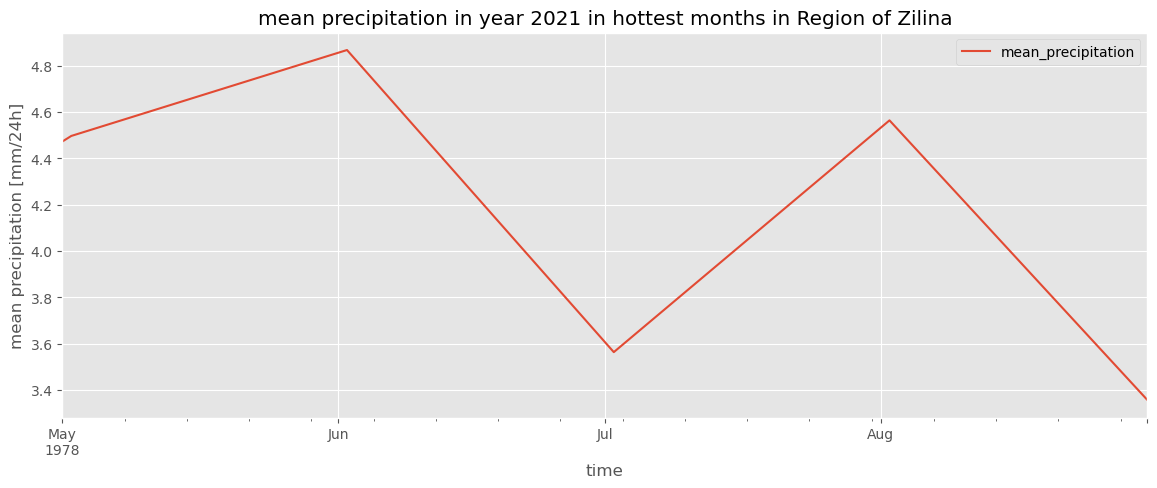

In [309]:
zilina_hottest[zilina_hottest.index.year==1978].plot(figsize=(14, 5))
plt.ylabel("mean precipitation [mm/24h]")
plt.title("mean precipitation in year 2021 in hottest months in Region of Zilina")

Text(0.5, 1.0, 'mean precipitation in year 2021 in hottest months')

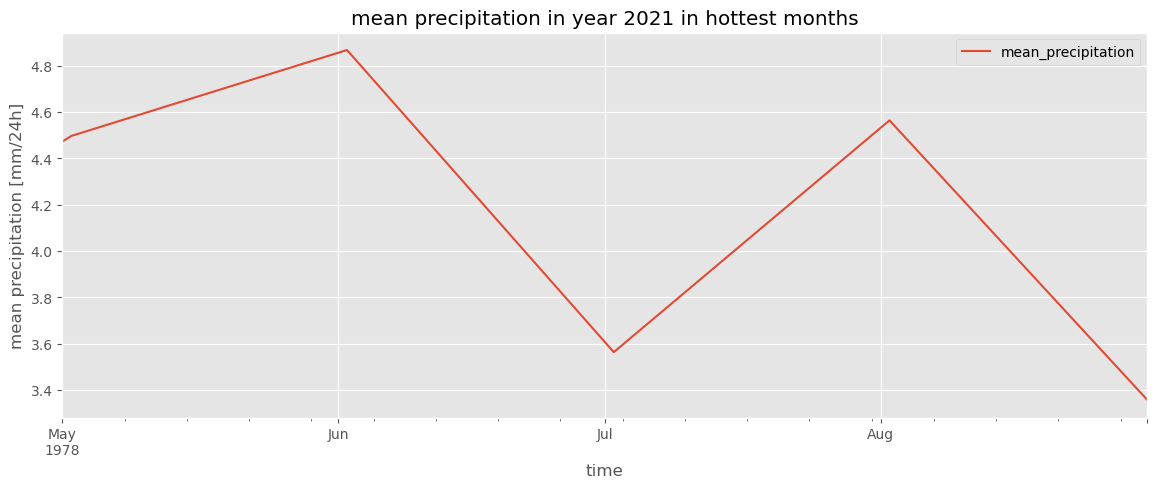

In [307]:
banska_hottest[banska_hottest.index.year==1978].plot(figsize=(14, 5))
plt.ylabel("mean precipitation [mm/24h]")
plt.title("mean precipitation in year 2021 in hottest months")

Text(0.5, 1.0, 'mean precipitation in year 2021 in hottest months')

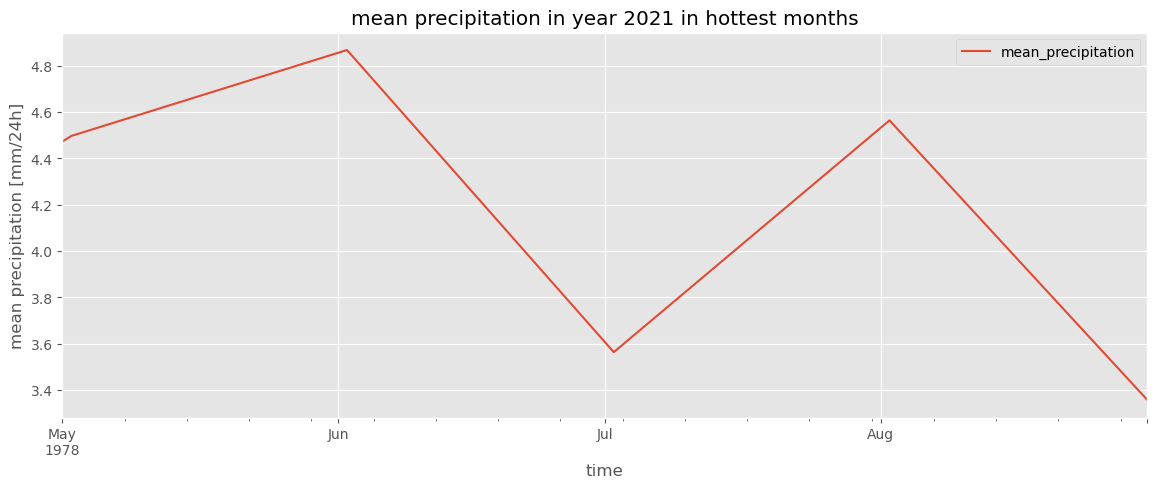

In [308]:
KEPO_hottest[KEPO_hottest.index.year==1978].plot(figsize=(14, 5))
plt.ylabel("mean precipitation [mm/24h]")
plt.title("mean precipitation in year 2021 in hottest months")